In [1]:
import numpy as np 

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

## 1 . Read the dataset

In [4]:
df = pd.read_csv(r'E:\DataScience\Machine Learning\height-weight.csv')

visualize the data

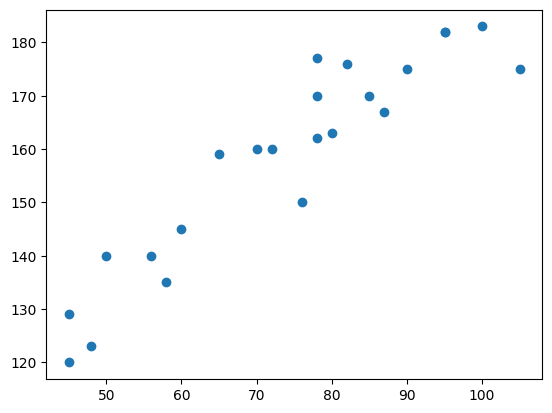

In [5]:
plt.scatter(df.Weight,df.Height)

## 2- Divide the data into X and Y

In [6]:
X = df[["Weight"]]
Y = df[["Height"]]

In [7]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [8]:
Y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


## 3- Train-Test Split

In [9]:
from sklearn.model_selection import  train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)

In [10]:
X_train

,Weight
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78
22,72


In [11]:
Y_train

,Height
4,160
2,123
18,150
6,163
7,175
1,135
14,170
0,120
15,177
22,160


## 4-Scalling

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
# Trained data >> Fit_transform
# Test data >>> Transform

In [15]:
# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [16]:
X_test_scaled

array([[-1.84594029],
       [-0.637963  ],
       [-0.93995732],
       [ 1.47599724],
       [ 0.69081201],
       [-1.54394597],
       [ 0.38881769]])

In [17]:
X_train_scaled

array([[-0.33596868],
       [-1.6647437 ],
       [ 0.0264245 ],
       [ 0.26801996],
       [ 0.8720086 ],
       [-1.06075505],
       [ 0.57001428],
       [-1.84594029],
       [ 0.14722223],
       [-0.21517095],
       [-1.18155278],
       [ 0.14722223],
       [ 1.17400292],
       [ 1.77799157],
       [ 1.17400292],
       [ 0.14722223]])

## Model Training

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()

In [20]:
reg

LinearRegression()

In [21]:
reg.fit(X_train,Y_train)

LinearRegression()

In [22]:
print("The coef is",reg.coef_)
print("the intercept is",reg.intercept_)

The coef is [[1.08528678]]
the intercept is [76.99301746]


In [23]:
reg.predict(X_train)

array([[152.96309227],
       [129.08678304],
       [159.47481297],
       [163.8159601 ],
       [174.66882793],
       [139.93965087],
       [169.24239401],
       [125.83092269],
       [161.64538653],
       [155.13366584],
       [137.76907731],
       [161.64538653],
       [180.09526185],
       [190.94812968],
       [180.09526185],
       [161.64538653]])

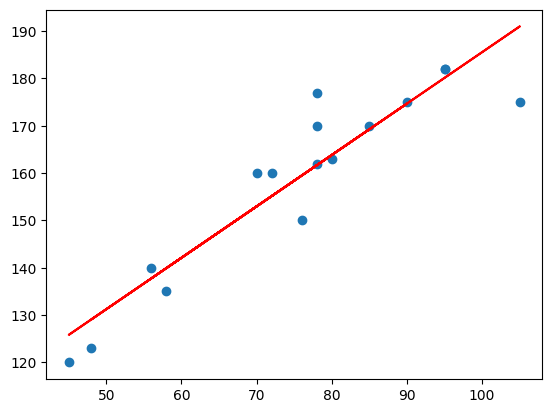

In [24]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,reg.predict(X_train),color = 'red')
plt.show()

In [25]:
reg.predict(X_test)

array([[125.83092269],
       [147.53665835],
       [142.11022444],
       [185.52169576],
       [171.41296758],
       [131.25735661],
       [165.98653367]])

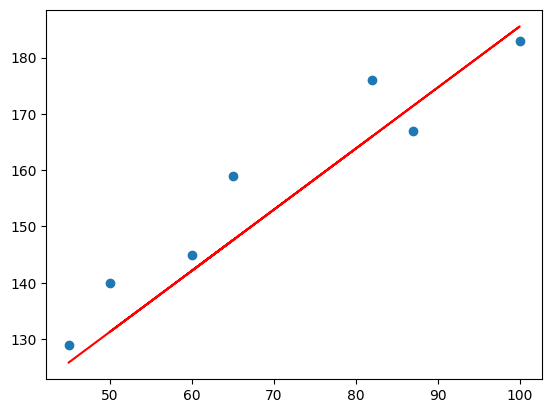

In [26]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,reg.predict(X_test),color = 'red')
plt.show()

## Evaluation Matrices

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [29]:
mean_squared_error(Y_test,reg.predict(X_test))

50.33408704814389

In [30]:
mean_absolute_error(Y_test,reg.predict(X_test))

6.173281083006777

In [31]:
# RMSE
np.sqrt(mean_squared_error(Y_test,reg.predict(X_test)))

7.094652003315166

In [33]:
score = r2_score(Y_test,reg.predict(X_test))

In [34]:
score

0.8505773497298528

In [35]:
X_test.shape

(7, 1)

In [36]:
X_test.shape[1]

1

In [41]:
# adjusted r-square = 1-(1-rsq)*N-1/n-p-1
adr = 1-(1-score)*(len(Y_test) - 1 ) / (len(Y_test) - X_test.shape[1]-1)

In [42]:
adr

0.8206928196758233